In [1]:
import pyvista as pv
sphere = pv.Sphere()

# short example
sphere.plot(jupyter_backend='trame')

# long example
plotter = pv.Plotter(notebook=True)
plotter.add_mesh(sphere)
plotter.show(jupyter_backend='trame')


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast
2024-02-25 15:19:03.161 (   3.413s) [    7D614786D740]vtkXOpenGLRenderWindow.:651    ERR| vtkXOpenGLRenderWindow (0x3be54a0): Cannot create GLX context.  Aborting.
ERROR:root:Cannot create GLX context.  Aborting.


: 

In [1]:
%matplotlib widget

In [2]:
from __future__ import annotations

from copy import deepcopy

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

from curvelets.numpy.udct import SimpleUDCT

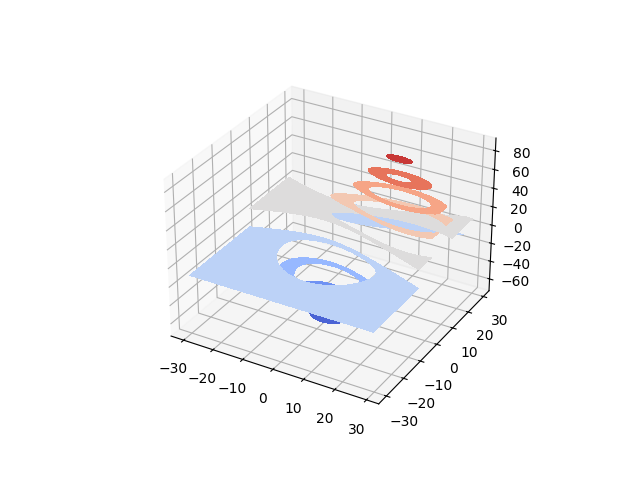

In [3]:
ax = plt.figure().add_subplot(projection="3d")
X, Y, Z = axes3d.get_test_data(0.05)
ax.contourf(X, Y, Z, cmap=cm.coolwarm)

In [4]:
nscales = 3
nbands = 3

shape = (32, 32, 32)
zeros_img = np.zeros(shape)
cfg = np.array([[3, 3], [6, 3]])
C = SimpleUDCT(shape=shape, nscales=nscales, nbands_per_direction=nbands)
coeffs_zero = C.forward(zeros_img)


In [5]:
ires = 1
idir = 0
iang = 0
icenters = tuple((np.asarray(coeffs_zero[ires][idir][iang].shape) + 1) // 2)

coeffs_curv = deepcopy(coeffs_zero)
coeffs_curv[1][0][0][icenters] = 1
curv = C.backward(coeffs_curv)

In [6]:
X, Y, Z = np.meshgrid(*[np.arange(s) for s in shape], indexing="ij")
abscurv = np.abs(curv)
curvmax = abscurv.max()
curvmin = abscurv.min()
keep = abscurv >= 0.1 * curvmax
# color = abscurv[keep]
# color /= color.max()

In [7]:
# fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
# surf = ax.scatter(X[keep], Y[keep], Z[keep], linewidth=0.2, antialiased=True)

In [8]:
# # from matplotlib import cm
# # from matplotlib.colors import LightSource
# # fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

# keep = (0.85 * abscurv.max() > abscurv) & (abscurv > 0.5 * abscurv.max())

# surf = ax.plot_trisurf(X[keep], Y[keep], Z[keep], linewidth=0, antialiased=True)

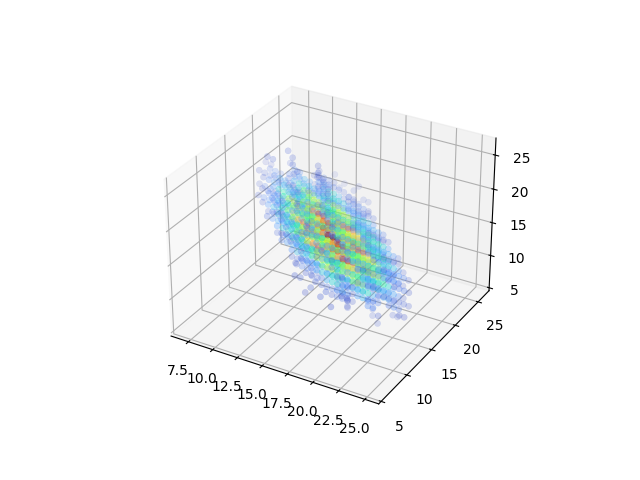

In [9]:
norm = mpl.colors.Normalize(0, curvmax, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap="turbo")

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
surf = ax.scatter(
    X[keep],
    Y[keep],
    Z[keep],
    color=mapper.to_rgba(
        abscurv[keep], np.sqrt((abscurv[keep] - curvmin) / (curvmax - curvmin))
    ),
    linewidth=0.2,
    antialiased=True,
)
plt.show()

In [10]:
import pyvista as pv
keep2 = (0.85 * abscurv.max() > abscurv) & (abscurv > 0.5 * abscurv.max())

points = np.c_[X[keep2], Y[keep2], Z[keep2]]
cloud = pv.PolyData(points)
cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.0)
# shell = volume.extract_geometry()
# shell.plot()

: 